### 1. Considere las alturas $b_i = [0, 8, 8, 20]$ alcanzadas en $t_i = [0, 1, 3, 4]$.

### ¿Cuál es la mejor recta $C + Dt$ que aproxima en el sentido de los cuadrados mínimos? Haga un dibujo.

###  Observación: ¿pueden los $t_i$ o los $b_i$ estar repetidos?

La respuesta es **sí**, cada caso tiene una interpretación clara.

### 1. Cuando se repite la variable independiente ($t_i$)

Esto es muy común en la experimentación y el análisis de datos.

+   **Interpretación:** Significa que has tomado **múltiples mediciones en el mismo punto de tiempo** (o bajo la misma condición). Por ejemplo, si estuvieramos midiendo la altura de varias plantas en un experimento, podríamos medir tres plantas distintas a las `t = 3` horas.

+   **Ejemplo:** Los datos podrían ser:
    +   $t_i = [0, 1, \textbf{3, 3}, 4]$
    +   $b_i = [0, 8, \textbf{7, 9}, 20]$

    Aquí, en el tiempo `t = 3`, tenemos dos mediciones de altura: una de 7 y otra de 9.

+   **¿Cómo afecta al cálculo?** El método de mínimos cuadrados lo maneja sin ningún problema. De hecho, es beneficioso:
    +   Aumenta la "importancia" o el "peso" de ese punto `t`. La recta de regresión será "atraída" con más fuerza hacia el **promedio** de los valores de `b` en ese punto. En nuestro ejemplo, la recta intentará pasar cerca del punto `(3, 8)`, que es el promedio de las alturas 7 y 9.
    +   Da una idea de la **variabilidad o el ruido** de las mediciones en ese punto específico.

---

### 2. Cuando se repite la variable dependiente ($b_i$)

Este es precisamente el caso del enunciado.

+   **Interpretación:** Significa que se ha obtenido el **mismo resultado o medición en diferentes momentos**.

+   **Ejemplo (enunciado):**
    +   $t_i = [0, \textbf{1}, \textbf{3}, 4]$
    +   $b_i = [0, \textbf{8}, \textbf{8}, 20]$

    Aquí, la altura `b = 8` se alcanzó en dos momentos distintos: en `t = 1` y en `t = 3`. Esto podría significar que el crecimiento se estancó o hubo una meseta durante ese período.

+   **¿Cómo afecta al cálculo?** El algoritmo de mínimos cuadrados trata `(1, 8)` y `(3, 8)` como **dos puntos de datos completamente independientes**. No les da un tratamiento especial por tener la misma coordenada `b`. Cada punto contribuye por separado al cálculo del error total que se debe minimizar. La recta final simplemente buscará la mejor forma de pasar cerca de ambos puntos (y de todos los demás), según lo dicte la matemática.

En resumen, la repetición de valores no solo es permitida, sino que es una característica común y a menudo informativa de los conjuntos de datos del mundo real. El método de mínimos cuadrados es lo suficientemente robusto para manejar ambas situaciones sin problemas.




In [1]:
import numpy as np

t = np.array([0,1,3,4])
b = np.array([0,8,8,20])

tamaño_muestra = len(b) # len(b) = len(t)
unos = np.ones(tamaño_muestra)

A = np.c_[unos,t]


print(A)



[[1. 0.]
 [1. 1.]
 [1. 3.]
 [1. 4.]]


In [2]:
At = A.T

#print (A, '\n', At)

C, D = np.linalg.solve(At @ A, At @ b)

print(C, D)

def recta_cm(t):
   return C + D*t


1.0 4.0


### Hagamos un plot

In [2]:
import pandas as pd

columnas = {'t_i': t, 'b_i': b}

df = pd.DataFrame(columnas)

df['recta_cm'] = C + D * df['t_i'] # operación vectorizada, NO USAR .apply()

df

,t_i,b_i,recta_cm
0,0,0,1.0
1,1,8,5.0
2,3,8,13.0
3,4,20,17.0


<Axes: xlabel='t_i', ylabel='b_i'>

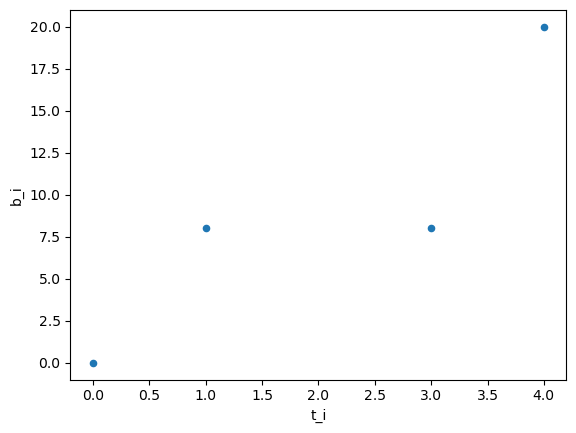

In [3]:
df.plot.scatter('t_i', 'b_i')

<Axes: xlabel='t_i', ylabel='b_i'>

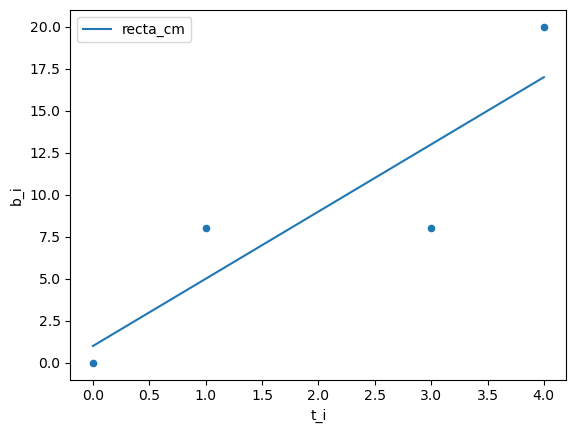

In [4]:
# guardamos el plot de pandas en ax
ax = df.plot.scatter('t_i', 'b_i')

df.plot('t_i', 'recta_cm', ax = ax)


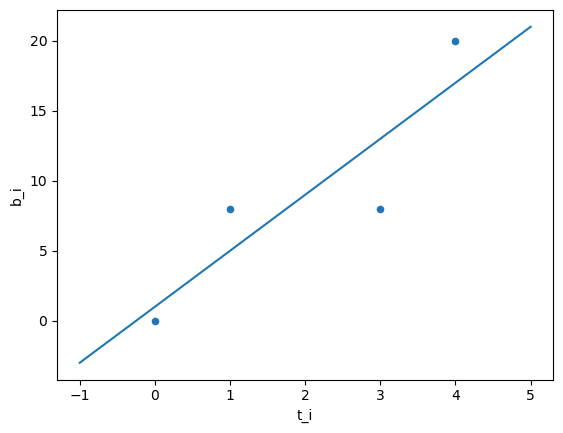

In [6]:
ax = df.plot.scatter('t_i', 'b_i')

t_extendido = np.linspace(-1, 5)

y_extendido = C + D*t_extendido

ax.plot(t_extendido, y_extendido)

